In [9]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
import os
os.environ['PATH'] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin\dot'
import graphviz

In [11]:
matplotlib.rc('font',family='NanumGothic')

In [12]:
df=pd.read_csv('체질검사.csv',engine='python')

In [13]:
df_y=df['FAT']
df_x=df.drop('FAT',axis=1,inplace=False)

In [14]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}'.format(df_train_y.shape))

train data x size:(176, 13)
train data y size:(176,)
test data x size:(76, 13)
test data y size:(176,)


In [15]:
tree_un=DecisionTreeRegressor(random_state=1234)
tree_un.fit(df_train_x,df_train_y)
print('score on test set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

score on test set:1.000
score on test set:0.303


In [16]:
tree_un

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

In [17]:
train_score=[]
test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [18]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.303
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


C:\Users\Hanyuri\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


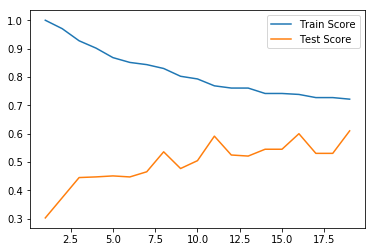

In [19]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='-',label='Test Score')
plt.legend()

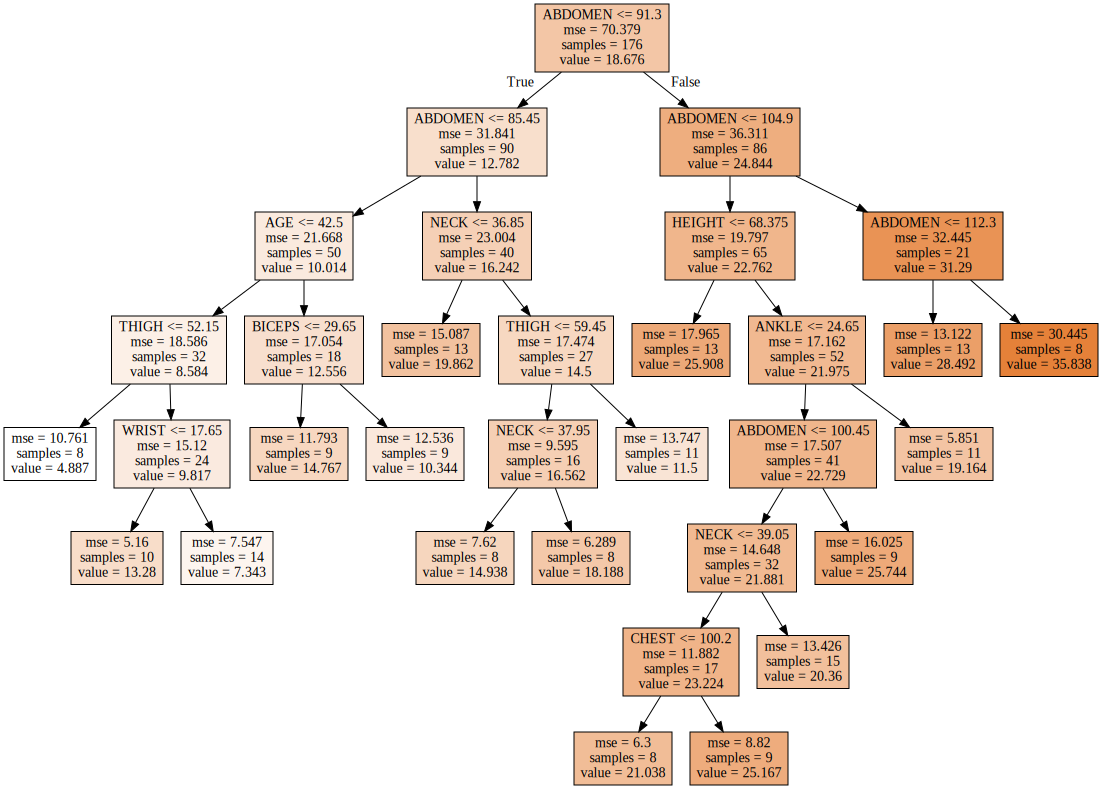

In [20]:
v_feature_names=df_train_x.columns
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_leaf.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

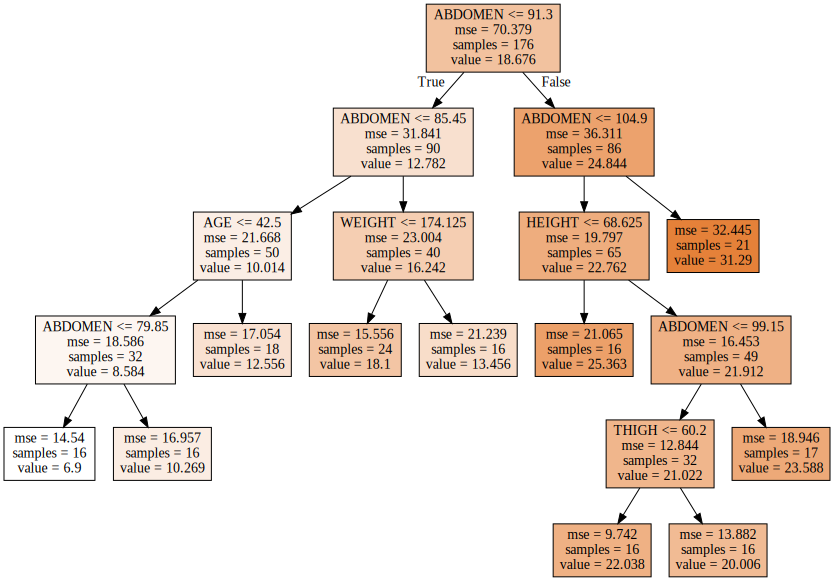

In [21]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=16)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_leaf.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_leaf.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [14]:
train_score=[]
test_score=[]
para_split=[n_split*2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=v_min_samples_split)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [15]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.830,0.536
1,6,0.830,0.536
2,8,0.830,0.536
3,10,0.830,0.536
4,12,0.830,0.536
5,14,0.830,0.536
6,16,0.830,0.536
7,18,0.821,0.557
8,20,0.813,0.581
9,22,0.792,0.567


C:\Users\Hanyuri\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


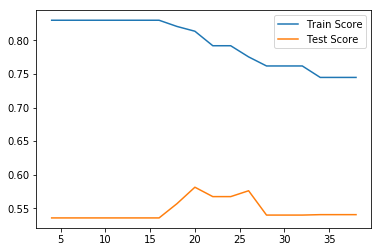

In [16]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.legend()

In [6]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_split.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_split.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

NameError: name 'df_train_x' is not defined

In [18]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=26)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_split.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_split.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

ExecutableNotFound: failed to execute ['dot', '-Tsvg'], make sure the Graphviz executables are on your systems' PATH

In [19]:
train_score=[]
test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20\
                               ,max_depth=v_max_depth)
    tree.fit(df_train_x,df_train_y)
    train_score.append(tree.score(df_train_x,df_train_y))
    test_score.append(tree.score(df_test_x,df_test_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplessplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [24]:
df_score_depth.round(3)


,MinSamplessplit,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


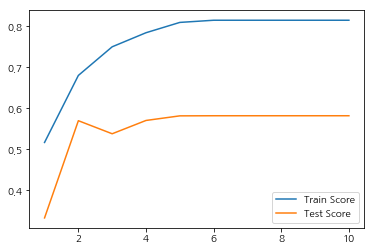

In [25]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='-',label='Test Score')
plt.legend()

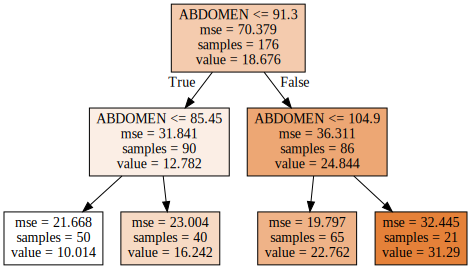

In [26]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20\
                                ,max_depth=2)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

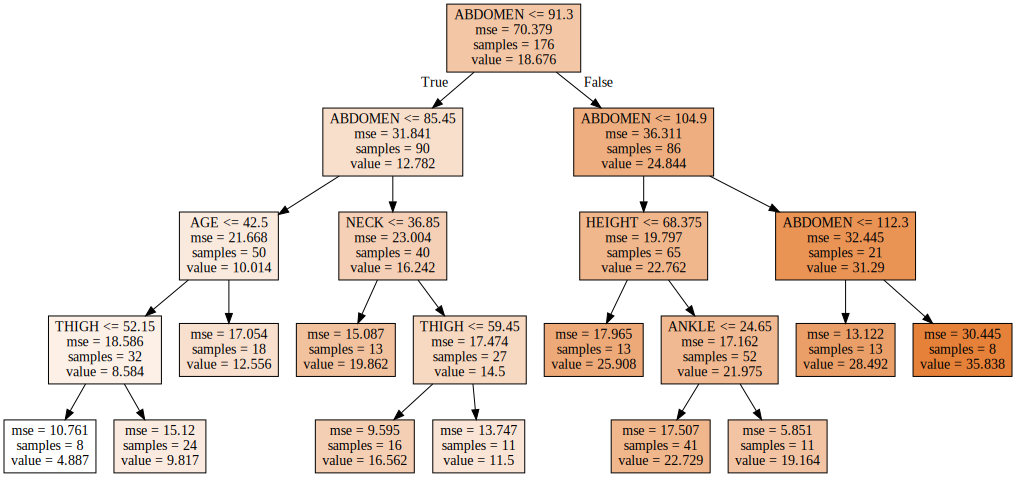

In [27]:
tree_graph=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20\
                                ,max_depth=4)
tree_graph.fit(df_train_x,df_train_y)
export_graphviz(tree_graph,out_file='tree_depth.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_depth.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [28]:
tree_final=DecisionTreeRegressor(random_state=1234,min_samples_leaf=8,min_samples_split=20\
                                ,max_depth=4)
tree_final.fit(df_train_x,df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=8,
           min_samples_split=20, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1234, splitter='best')

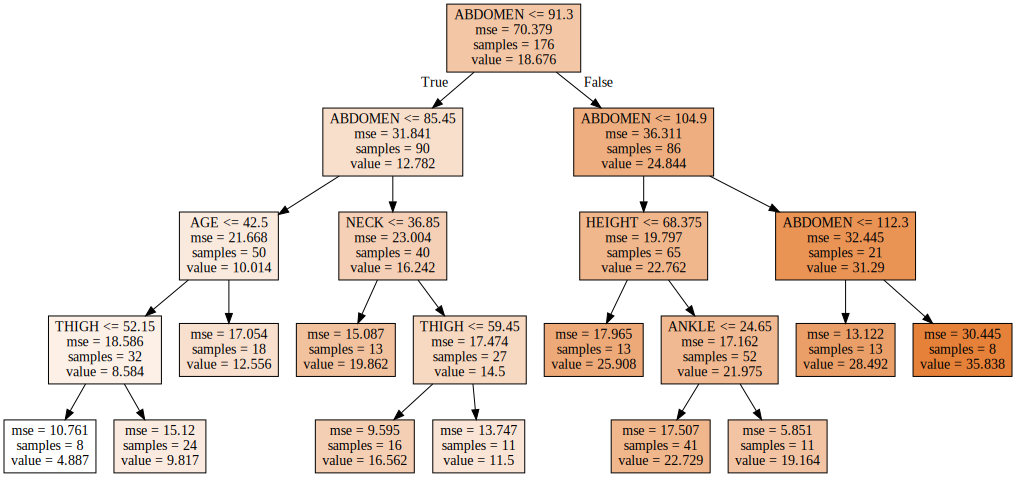

In [29]:
export_graphviz(tree_final,out_file='tree_final.dot',feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [31]:
df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)

,feature,importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

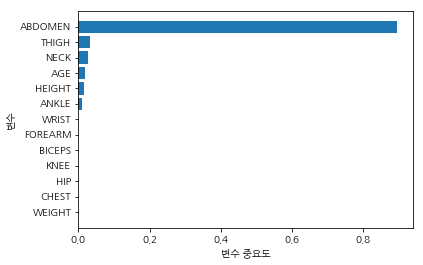

In [32]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [37]:
estimator=DecisionTreeRegressor()
param_grid={'criterion':['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],\
           'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}
grid_df=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
grid_df.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_df.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_df.best_params_))
print('best score:\n{}'.format(grid_df.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
DecisionTreeRegressor(criterion='mae', max_depth=4, max_features='auto',
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=17,
           min_samples_split=6, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

best parameter:
{'criterion': 'mae', 'max_depth': 4, 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 6}
best score:
0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import export_graphviz
import graphviz

In [42]:
df_y=df['FAT']
df_x=df.drop('FAT',axis=1,inplace=False)
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)

rf_un=RandomForestRegressor(random_state=1234)
rf_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(rf_un.score(df_test_x,df_test_y)))

score on training set:0.934
score on test set:0.552


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [43]:
rf_un

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

In [47]:
train_score=[]
test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    rf=RandomForestRegressor(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_n = pd.DataFrame()
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score

In [48]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.934,0.552
1,20,0.945,0.600
2,30,0.951,0.615
3,40,0.954,0.613
4,50,0.954,0.610
5,60,0.956,0.614
6,70,0.955,0.614
7,80,0.955,0.612
8,90,0.956,0.610
9,100,0.956,0.611


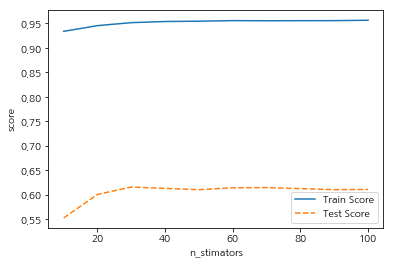

In [49]:
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

In [51]:
train_score=[]
test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                             min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score

In [52]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.956,0.611
1,2,0.939,0.610
2,3,0.915,0.611
3,4,0.891,0.617
4,5,0.869,0.622
5,6,0.849,0.627
6,7,0.830,0.626
7,8,0.816,0.621
8,9,0.800,0.619
9,10,0.786,0.619


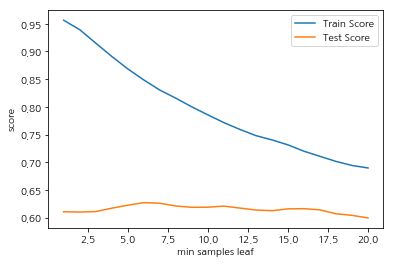

In [53]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [58]:
train_score=[]
test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                             min_samples_leaf=6,min_samples_split=v_min_samples_split)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score

In [59]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.849,0.627
1,6,0.849,0.627
2,8,0.849,0.627
3,10,0.849,0.627
4,12,0.849,0.627
5,14,0.839,0.629
6,16,0.831,0.629
7,18,0.821,0.628
8,20,0.813,0.628
9,22,0.803,0.628


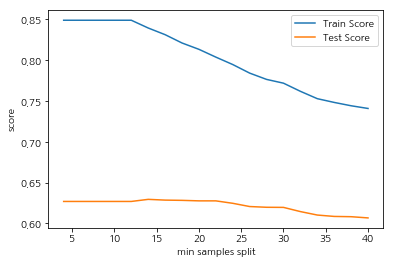

In [60]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [61]:
train_score=[]
test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestRegressor(random_state=1234,n_estimators=100,\
                             min_samples_leaf=6,min_samples_split=14\
                               ,max_depth=v_max_depth)
    rf.fit(df_train_x,df_train_y)
    train_score.append(rf.score(df_train_x,df_train_y))
    test_score.append(rf.score(df_test_x,df_test_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplessplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score

In [62]:
df_score_depth.round(3)


,MinSamplessplit,TrainScore,TestScore
0,1,0.557,0.448
1,2,0.721,0.598
2,3,0.789,0.620
3,4,0.825,0.627
4,5,0.837,0.631
5,6,0.839,0.629
6,7,0.839,0.629
7,8,0.839,0.629
8,9,0.839,0.629
9,10,0.839,0.629


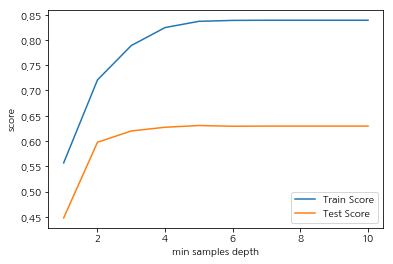

In [63]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

In [65]:
rf_final=RandomForestRegressor(random_state=1234,n_estimators=100,\
                             min_samples_leaf=6,min_samples_split=14\
                               ,max_depth=4)
rf_final.fit(df_train_x,df_train_y)
print('score on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
rf_final

score on trainig set:0.825
score on test set:0.627


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=6, min_samples_split=14,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

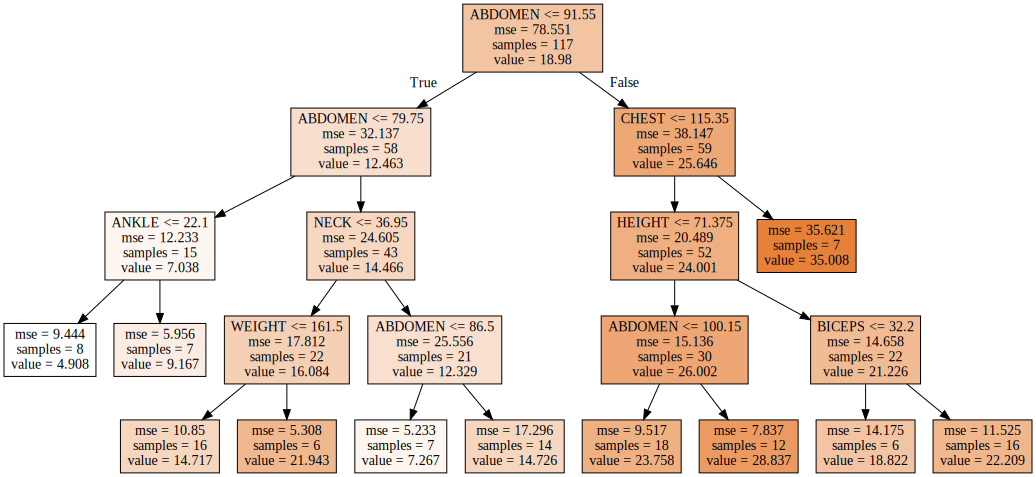

In [67]:
v_feature_names=df_train_x.columns

export_graphviz(rf_final.estimators_[0],out_file='rfr_final_0.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

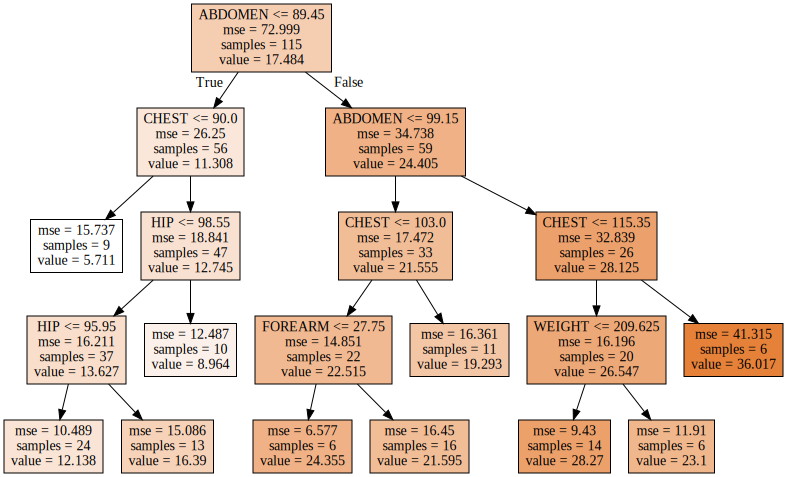

In [68]:
v_feature_names=df_train_x.columns

export_graphviz(rf_final.estimators_[1],out_file='rfr_final_1.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_1.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

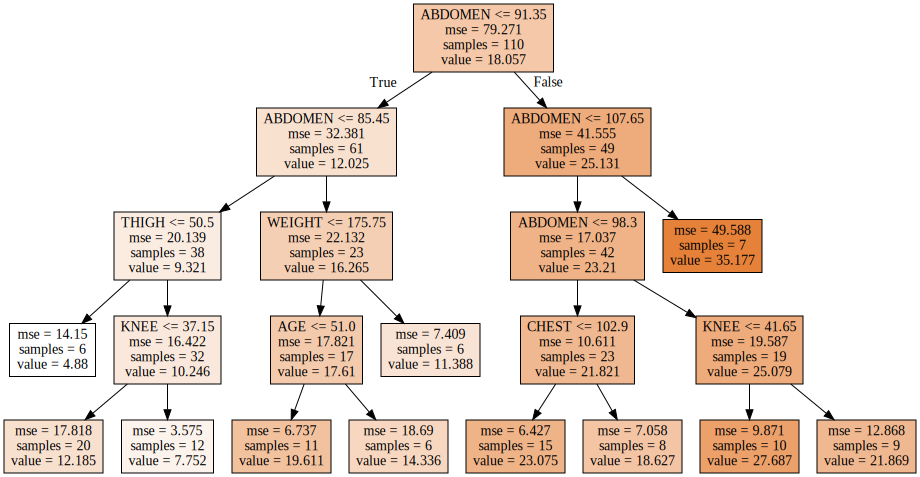

In [69]:
v_feature_names=df_train_x.columns

export_graphviz(rf_final.estimators_[10],out_file='rfr_final_10.dot',\
                feature_names=v_feature_names,impurity=True,filled=True)
with open('rfr_final_10.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

In [70]:
df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)

,feature,importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

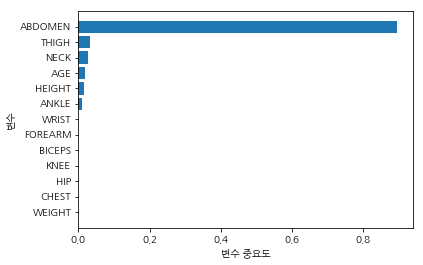

In [71]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

In [72]:
estimator=RandomForestRegressor(random_state=1234)
param_grid={'max_depth':para_depth,'min_samples_split':para_split,'min_samples_leaf':para_leaf}
grid_dt=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
grid_dt.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_dt.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_dt.best_params_))
print('best score:\n{}'.format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model:
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=8,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=4,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=1234, verbose=0, warm_start=False)

best parameter:
{'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 4}
best score:
0.685


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


#  그래디언트 부스팅

In [73]:
from sklearn.ensemble import GradientBoostingRegressor

In [74]:
df_y=df['FAT']
df_x=df.drop('FAT',axis=1,inplace=False)

In [75]:
gb_un=GradientBoostingRegressor(random_state=1234)
gb_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(rf_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(rf_un.score(df_test_x,df_test_y)))

score on training set:0.934
score on test set:0.552


In [76]:
train_score=[]
test_score=[]
para_n_tree=[n_tree*10 for n_tree in range(1,11)]

for v_n_estimators in para_n_tree:
    gb=GradientBoostingRegressor(n_estimators=v_n_estimators,random_state=1234)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_n = pd.DataFrame()
df_score_n['MinSamplesLeaf']=para_n_tree
df_score_n['TrainScore']=train_score
df_score_n['TestScore']=test_score



In [77]:
df_score_n.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,10,0.712,0.512
1,20,0.850,0.589
2,30,0.897,0.600
3,40,0.921,0.599
4,50,0.942,0.587
5,60,0.954,0.589
6,70,0.963,0.590
7,80,0.970,0.584
8,90,0.976,0.585
9,100,0.981,0.584


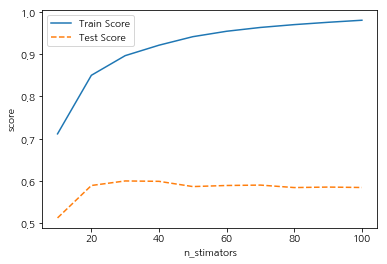

In [78]:
plt.plot(para_n_tree,train_score,linestyle='-',label='Train Score')
plt.plot(para_n_tree,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n_stimators')
plt.legend()

In [79]:
train_score=[]
test_score=[]
para_leaf=[n_leaf*1 for n_leaf in range(1,21)]

for v_min_samples_leaf in para_leaf:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf']=para_leaf
df_score_leaf['TrainScore']=train_score
df_score_leaf['TestScore']=test_score



In [80]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.897,0.600
1,2,0.899,0.596
2,3,0.896,0.595
3,4,0.893,0.586
4,5,0.890,0.604
5,6,0.888,0.596
6,7,0.884,0.590
7,8,0.874,0.610
8,9,0.879,0.598
9,10,0.873,0.587


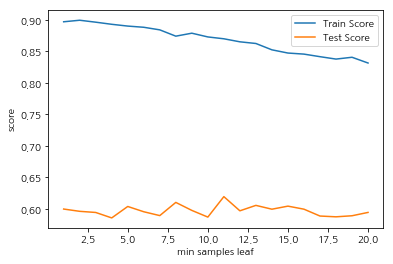

In [81]:
plt.plot(para_leaf,train_score,linestyle='-',label='Train Score')
plt.plot(para_leaf,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples leaf')
plt.legend()

In [83]:
train_score=[]
test_score=[]
para_split=[n_split*2 for n_split in range(2,21)]

for v_min_samples_split in para_split:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=11,min_samples_split=v_min_samples_split)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_split = pd.DataFrame()
df_score_split['MinSamplessplit']=para_split
df_score_split['TrainScore']=train_score
df_score_split['TestScore']=test_score



In [84]:
df_score_split.round(3)

,MinSamplessplit,TrainScore,TestScore
0,4,0.870,0.620
1,6,0.870,0.620
2,8,0.870,0.620
3,10,0.870,0.620
4,12,0.870,0.620
5,14,0.870,0.620
6,16,0.870,0.620
7,18,0.870,0.620
8,20,0.870,0.620
9,22,0.870,0.620


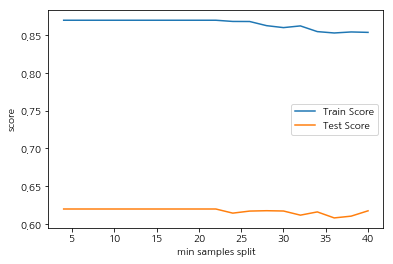

In [85]:
plt.plot(para_split,train_score,linestyle='-',label='Train Score')
plt.plot(para_split,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples split')
plt.legend()

In [87]:
train_score=[]
test_score=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=11,min_samples_split=22\
                               ,max_depth=v_max_depth)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))
                      
df_score_depth = pd.DataFrame()
df_score_depth['MinSamplessplit']=para_depth
df_score_depth['TrainScore']=train_score
df_score_depth['TestScore']=test_score



In [88]:
df_score_depth.round(3)


,MinSamplessplit,TrainScore,TestScore
0,1,0.703,0.592
1,2,0.800,0.600
2,3,0.870,0.620
3,4,0.900,0.629
4,5,0.913,0.613
5,6,0.917,0.614
6,7,0.920,0.613
7,8,0.920,0.615
8,9,0.921,0.609
9,10,0.922,0.616


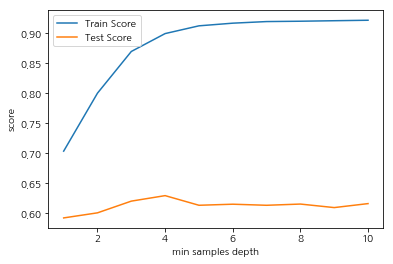

In [89]:
plt.plot(para_depth,train_score,linestyle='-',label='Train Score')
plt.plot(para_depth,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('min samples depth')
plt.legend()

In [91]:
train_score=[]
test_score=[]
para_lr=[lr*0.1 for lr in range(1,10)]
for v_learning_rate in para_lr:
    gb=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=11,min_samples_split=22\
                               ,max_depth=4,learning_rate=v_learning_rate)
    gb.fit(df_train_x,df_train_y)
    train_score.append(gb.score(df_train_x,df_train_y))
    test_score.append(gb.score(df_test_x,df_test_y))

df_score_lr=pd.DataFrame()
df_score_lr['learningrate']=para_lr
df_score_lr['trainscore']=train_score
df_score_lr['testscore']=test_score


In [92]:
df_score_lr.round(3)

,learningrate,trainscore,testscore
0,0.1,0.900,0.629
1,0.2,0.940,0.588
2,0.3,0.966,0.566
3,0.4,0.981,0.539
4,0.5,0.984,0.533
5,0.6,0.990,0.527
6,0.7,0.993,0.478
7,0.8,0.994,0.437
8,0.9,0.997,0.464


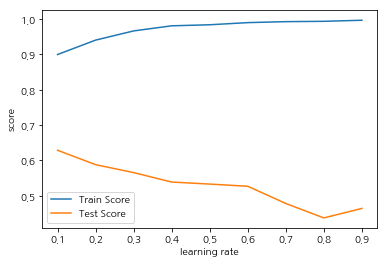

In [93]:
plt.plot(para_lr,train_score,linestyle='-',label='Train Score')
plt.plot(para_lr,test_score,linestyle='-',label='Test Score')
plt.ylabel('score'); plt.xlabel('learning rate')
plt.legend()

In [94]:
gb_final=GradientBoostingRegressor(random_state=1234,n_estimators=30,\
                             min_samples_leaf=11,min_samples_split=22\
                               ,max_depth=4,learning_rate=0.1)
gb_final.fit(df_train_x,df_train_y)

print('score on trainig set:{:.3f}'.format(gb_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(gb_final.score(df_test_x,df_test_y)))

score on trainig set:0.900
score on test set:0.629


In [95]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=gb_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
df_importance.round(3)



,feature,importance
5,ABDOMEN,0.775
2,HEIGHT,0.038
12,WRIST,0.025
3,NECK,0.023
6,HIP,0.021
4,CHEST,0.021
0,AGE,0.021
7,THIGH,0.020
8,KNEE,0.017
10,BICEPS,0.014


Text(0, 0.5, '변수')

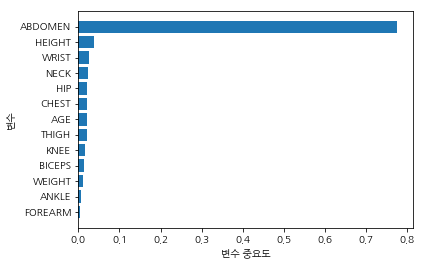

In [98]:
df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')


In [100]:
estimator=GradientBoostingRegressor(random_state=1234)
param_grid={'criterion':['mse','friedman_mse','mae'],'max_features':['auto','sqrt','log2'],\
           'learning_rate':para_lr,'max_depth':para_depth,'min_samples_split':para_split,\
            'min_samples_leaf':para_leaf}
grid_df=GridSearchCV(estimator,param_grid,scoring='r2',n_jobs=-1)
grid_df.fit(df_train_x,df_train_y)

print('best estimator model:\n{}'.format(grid_gb.best_estimator_))
print('\nbest parameter:\n{}'.format(grid_gb.best_params_))
print('best score:\n{}'.format(grid_gb.best_score_.round(3)))

KeyboardInterrupt: 